# Problem Set #3
### 2013-10963 Seha Lee

In [1]:
#1 
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    y=pow(x,4)
    return np.sin(y)

In [2]:
#1(a)

def trapezoid(a,b,n):
    h=(b-a)/n
    sum = (func(a)+func(b))/2
    for i in range (1,n):
        sum += func(a+i*h)
    return h*sum


a=0
b=4
true=0.347032

for i in range (1,6):
    n=pow(10,i)
    t=trapezoid(a,b,n)
    err=t/true
    print('n=',n,'the value=',t,'error=',err)

n= 10 the value= -0.4550743997394941 error= -1.3113326717406293
n= 100 the value= 0.4778474142422449 error= 1.3769549039922684
n= 1000 the value= 0.3470181924013782 error= 0.9999602123186859
n= 10000 the value= 0.3470319389082802 error= 0.9999998239594049
n= 100000 the value= 0.3470320733981991 error= 1.000000211502683


In [3]:
#1(b)

def simpson(a,b,n):
    h=(b-a)/n
    x=a
    sum=func(a)+func(b)
    for i in range(1,n-1,2):
        x+=h
        sum+=4.*func(x)
        x+=h
        sum+=2.*func(x)
    sum+= 4.*func(x+h)
    sum*=(h/3)
    return sum


a=0
b=4
true=0.347032

for i in range (1,6):
    n=pow(10,i)
    s=simpson(a,b,n)
    err=s/true
    print('n=',n,'the value=',s,'error=',err)

n= 10 the value= -0.6657239139084418 error= -1.9183358131481874
n= 100 the value= 0.6091835645586793 error= 1.7554103499351048
n= 1000 the value= 0.3470334785954554 error= 1.0000042606890875
n= 10000 the value= 0.34703207487290993 error= 1.0000002157521783
n= 100000 the value= 0.34703207476355197 error= 1.0000002154370546


In [4]:
#1(c)

a=0
b=4
true=0.347032

for i in range(0,10):
    deg=2**i
    x,w=np.polynomial.legendre.leggauss(deg) 
    sum=0
    for j in range (deg):
        sum+=w[j]*func(0.5*(a+b+x[j]*(b-a)))
    sum*=(0.5*b-0.5*a)
    err=sum/true
    print('nodes=',deg, ', the value=',sum,'error',err)

nodes= 1 , the value= -1.1516132666602612 error -3.3184641954063636
nodes= 2 , the value= -1.0154850664459294 error -2.926200080816551
nodes= 4 , the value= 1.1770736008851026 error 3.391830150778898
nodes= 8 , the value= 0.155456975579981 error 0.4479615008989978
nodes= 16 , the value= -0.6523526179643004 error -1.879805372312353
nodes= 32 , the value= 0.923506454978749 error 2.661156478303871
nodes= 64 , the value= 0.10704187584038687 error 0.308449583440106
nodes= 128 , the value= 0.3457215663342512 error 0.9962238823343416
nodes= 256 , the value= 0.3470320747563894 error 1.0000002154164152
nodes= 512 , the value= 0.3470320747563789 error 1.000000215416385


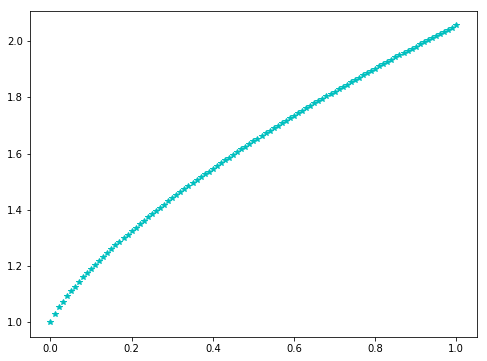

In [4]:
#2 not completed yet

def func(m,p):
    a=p*np.arctan(m*np.tan(p))
    b=1-p/np.tan(p)
    return a/b

def simpson(a,b,n,m):
    h=(b-a)/n
    x=a
    sum=func(m,b)
    for i in range(1,n-1,2):
        x+=h
        sum+=4.*func(m,x)
        x+=h
        sum+=2.*func(m,x)
    sum+= 4.*func(m,x+h)
    sum*=(h/3)
    return sum

def H(m):
    a,b=0,np.pi/2
    n=10**6
    return np.exp(simpson(a,b,n,m)/np.pi)/(1+m)

x=[]
y=[]
for m in np.arange(0,1.01,0.01):
    x.append(m)
    y.append(H(m))
    
fig=plt.figure(1,figsize=(8,6))    
plt.plot(x,y,'c*')

In [5]:
#3
x = [-2.1, -1.45, -1.3, -0.2, 0.1, 0.15, 0.8, 1.1, 1.5, 2.8, 3.8]
y = [0.012155, 0.122151, 0.184520, 0.960789, 0.990050, \
     0.977751, 0.527292, 0.298197, 0.105399, 3.936690e-4, 5.355348e-7]

In [6]:
#3(a) 

def P(x):
    P=y0+(y1-y0)*(x-x0)/(x1-x0)
    return P

In [7]:
#3(a) x=3.2
x0,x1=x[9],x[10]
y0,y1=y[9],y[10]

print(P(3.2))

0.00023641561391999984


In [8]:
#3(a) x=0.4
x0,x1=x[5],x[6]
y0,y1=y[5],y[6]

print(P(0.4))

0.8044975384615385


In [9]:
#3(a) x=-0.128
x0,x1=x[3],x[4]
y0,y1=y[3],y[4]

print(P(-0.128))

0.96781164


In [10]:
#3(a) x=-2.0
x0,x1=x[0],x[1]
y0,y1=y[0],y[1]

print(P(-2.0))

0.02907746153846155


In [11]:
#3(b)

p=np.polyfit(x,y,10)
poly=np.poly1d(p)

print(poly(3.2),poly(0.4),poly(-0.128),poly(-2.0))

1.0971847796443637 0.8525647942463126 0.9838925180011041 -0.04753686373454391


In [12]:
#3(c)
from scipy import interpolate

result=interpolate.CubicSpline(x,y,bc_type='not-a-knot')
print('not-a-knot')
print(result(3.2),result(0.4),result(-0.128),result(-2.0))

result=interpolate.CubicSpline(x,y,bc_type='clamped')
print('clmaped')
print(result(3.2),result(0.4),result(-0.128),result(-2.0))

result=interpolate.CubicSpline(x,y,bc_type='natural')
print('natural')
print(result(3.2),result(0.4),result(-0.128),result(-2.0))

not-a-knot
0.020913382444461864 0.8508707001464908 0.9827112793582029 0.026816913358566518
clmaped
0.0030878602223043915 0.8508495579031811 0.9827512736917215 0.014588766043814271
natural
0.004769711225674885 0.8508498988093107 0.9827313805517449 0.020642415163977197


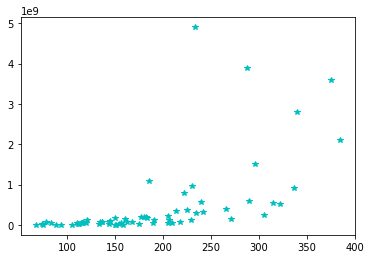

In [13]:
#4

fn ='./Downloads/BlackHall.txt' 
y,yerr,x,xerr=np.loadtxt(fn,unpack=True,usecols=(0,1,2,3))
plt.plot(x,y,'c*') #plot to assume the initial value; beta0

In [14]:
#4(a)
from scipy.odr import *


def bh(p,x):
    return np.exp(p[0]+p[1]*np.log(x))

model=Model(bh)
data=RealData(x,y)
odr=ODR(data,model,beta0=[2,4])

out=odr.run()
out.pprint()
out.beta
out.sum_square

Beta: [-10.34267881   5.56852233]
Beta Std Error: [2.82370713 0.52436892]
Beta Covariance: [[ 0.00362056 -0.00067122]
 [-0.00067122  0.00012486]]
Residual Variance: 2202.2325909598403
Inverse Condition #: 0.009142669994375924
Reason(s) for Halting:
  Sum of squares convergence


143145.11841238962

In [15]:
#4(b)
from scipy.odr import *

def bh(q,x):
    return np.exp(q[0]+q[1]*np.log(x))

model=Model(bh)
data=RealData(x,y,sx=xerr,sy=yerr)
odr=ODR(data,model,beta0=[2,4])

out=odr.run()
out.pprint()
out.beta
out.sum_square

Beta: [-1.83908433  3.94230897]
Beta Std Error: [2.0588227 0.4085116]
Beta Covariance: [[ 0.26769555 -0.05296438]
 [-0.05296438  0.01053931]]
Residual Variance: 15.834222612449016
Inverse Condition #: 0.01266788640643407
Reason(s) for Halting:
  Sum of squares convergence


1029.2244698091863

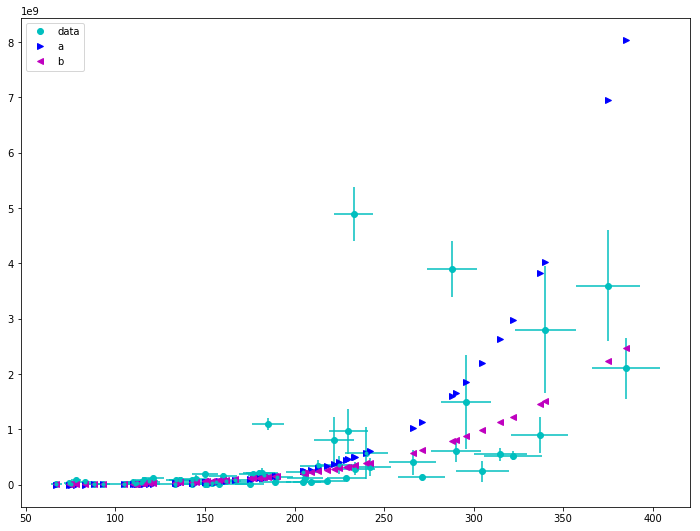

In [16]:
#4(c)

p= [-10.34267881,   5.56852233]
q=  [-1.83908433,  3.94230897]

fig=plt.figure(1,figsize=(12,9))
plt.plot(x,y,'co',label='data') 
plt.errorbar(x,y,xerr=xerr,yerr=yerr,fmt='c.')
plt.plot(x,bh(p,x),'b>',label='a')
plt.plot(x,bh(q,x),'m<',label='b')
plt.legend(loc=2)

In [17]:
#4(d)
fn ='./Downloads/BlackHall.txt' 
x,xerr,y,yerr=np.loadtxt(fn,unpack=True,usecols=(0,1,2,3))

def ins(r,y):
    return np.exp(r[0]+r[1]*np.log(y))

model=Model(ins)
data=RealData(x,y,sx=xerr,sy=yerr)
odr=ODR(data,model,beta0=[0,0])

out=odr.run()
out.pprint()
out.beta
out.sum_square

Beta: [0.46643363 0.25366241]
Beta Std Error: [0.47405959 0.02628491]
Beta Covariance: [[ 1.41928342e-02 -7.84212106e-04]
 [-7.84212106e-04  4.36331211e-05]]
Residual Variance: 15.834222557202356
Inverse Condition #: 0.004391771422167445
Reason(s) for Halting:
  Sum of squares convergence


1029.2244662181533

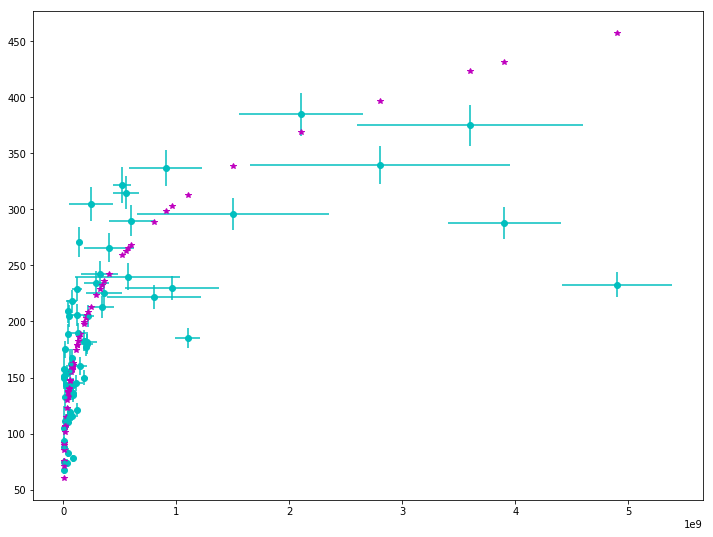

In [18]:
#4(d)
r=[0.46643363, 0.25366241]
fig=plt.figure(1,figsize=(12,9))
plt.plot(x,y,'co',label='data') 
plt.errorbar(x,y,xerr=xerr,yerr=yerr,fmt='c.')
plt.plot(x,ins(r,x),'m*')

In [19]:
#5
fn ='./Downloads/hw3p5.dat.txt' 
x,y=np.loadtxt(fn,unpack=True,usecols=(0,1))
from scipy.odr import *

In [20]:
#5(a)

def g_func(p,x):
    return p[0]+p[1]*np.exp(-((x-p[2])**2)/(2*p[3]**2))

model=Model(g_func)
data=RealData(x,y)
odr=ODR(data,model,beta0=[2.,1.,10.,5.])

out=odr.run()
out.pprint()
out.beta
out.sd_beta
out.sum_square

Beta: [2.24596817 1.21002593 9.85323762 3.26830598]
Beta Std Error: [0.03225683 0.04023559 0.10167456 0.15083998]
Beta Covariance: [[ 2.65106193e-02 -2.05544793e-02  3.24713220e-05 -9.17722979e-02]
 [-2.05544793e-02  4.12474778e-02  6.12190411e-03  2.47634259e-02]
 [ 3.24713220e-05  6.12190411e-03  2.63391140e-01 -1.94032445e-02]
 [-9.17722979e-02  2.47634259e-02 -1.94032445e-02  5.79708312e-01]]
Residual Variance: 0.03924853139033607
Inverse Condition #: 0.16610424601969542
Reason(s) for Halting:
  Sum of squares convergence


7.6927121525058695

In [21]:
#5(b)

def l_func(q,x):
    return q[0]+q[1]/(q[2]+(x-q[3])**2)

model=Model(l_func)
data=RealData(x,y)
odr=ODR(data,model,beta0=[2.,1.5,5.,10.])

out=odr.run()
out.pprint()
out.beta
out.sd_beta
out.sum_square

Beta: [ 1.98482569 28.60736858 19.05827517  9.81596832]
Beta Std Error: [0.05842442 4.7674164  2.74747625 0.10289057]
Beta Covariance: [[ 8.68782921e-02 -6.64939113e+00 -3.55673610e+00 -2.23441682e-03]
 [-6.64939113e+00  5.78480346e+02  3.26828683e+02  1.17469272e-02]
 [-3.55673610e+00  3.26828683e+02  1.92127853e+02 -8.16509703e-02]
 [-2.23441682e-03  1.17469272e-02 -8.16509703e-02  2.69447145e-01]]
Residual Variance: 0.0392895959958392
Inverse Condition #: 0.0020438781481211905
Reason(s) for Halting:
  Sum of squares convergence


7.700760815184483

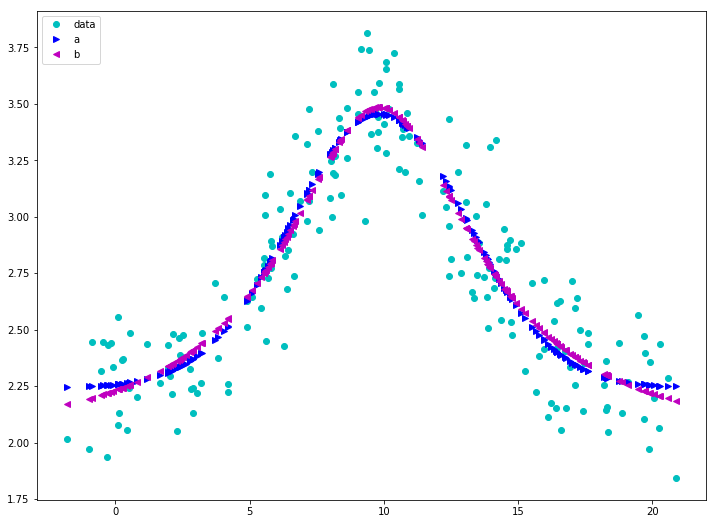

In [22]:
#5(c)
p= [2.24596817, 1.21002593, 9.85323762, 3.26830598]
q=  [ 1.98482569, 28.60736858, 19.05827517,  9.81596832]

fig=plt.figure(1,figsize=(12,9))

plt.plot(x,y,'co',label='data')
plt.plot(x,g_func(p,x),'b>',label='a')
plt.plot(x,l_func(q,x),'m<',label='b')
plt.legend(loc=2)

    (a) fits the data slightly better.